<a href="https://colab.research.google.com/github/ishwerdutt/pytorch/blob/main/Building_an_ann_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dependencies as needed:
# !pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
#file_path = "" # This was causing the error as it is an empty string
file_path = "fashion-mnist_train.csv" # Updated with correct file path

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zalando-research/fashionmnist",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-1-8bd6d8c97dfe>:11: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0  

In [2]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt

In [4]:
torch.manual_seed(42)

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
X = df.iloc[:, 1:].values  # all rows and all culumns after ist column(including ist column)

In [8]:
y = df.iloc[:, 0].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
X_train.shape

(48000, 784)

In [11]:
## Normalization

X_train = X_train / 255
X_test = X_test / 255

In [12]:
y_train

array([5, 7, 8, ..., 9, 4, 0])

## Custom Dataset class

In [13]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype = torch.float32)
    self.labels = torch.tensor(labels, dtype = torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [14]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [15]:
train_dataset[50]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.7529, 0.7020, 0.7098, 0.7412, 0.7529, 0.6667, 0.4314, 0.6196,
         0.6980, 0.2314, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000, 0.7765, 0.7647, 0.8902, 0.8392, 0.8667, 0.7725,
         0.7294, 0.7961, 0.4000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.1176, 0.4902, 0.2980, 0.2039, 0.3961, 0.1804, 0.0745,
         0.1686, 0.0667, 0.0667, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.2196, 0.5529, 0.4431, 0.4314, 0.4627, 0.3686,
         0.3059, 0.3373, 0.3137, 0.3569, 0.0745, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [16]:
len(train_dataset)

48000

In [17]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False, pin_memory = True)


In [18]:
class Model(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 10)  # No need to explicitely apply softmax, in keras we have to apply the softmax
    )


  def forward(self, x):
    return self.model(x)

In [23]:
epochs = 25
l_r = 0.1


In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [25]:
model = Model(X_train.shape[1])
model = model.to(device)


In [26]:
## loss function
import torch.optim as optim
criterion = nn.CrossEntropyLoss()

# optimizer

optimizer = optim.SGD(model.parameters(), lr = l_r)

# Training Loop

In [27]:
for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:
        # Move data to the same device as the model (if using GPU)
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        outputs = model(batch_features)  # Forward Pass
        loss = criterion(outputs, batch_labels)  # Corrected 'criterion'

        optimizer.zero_grad()  # Clearing the old gradients
        loss.backward()  # Backward pass and calculating gradients
        optimizer.step()  # Updating the model params

        total_epoch_loss += loss.item()

    # Log average loss for the epoch
    print(f"Epoch: {epoch+1}, Loss: {total_epoch_loss/len(train_loader)}")




Epoch: 1, Loss: 0.7224980002741019
Epoch: 2, Loss: 0.44300840368370215
Epoch: 3, Loss: 0.39347646048665047
Epoch: 4, Loss: 0.363939060802261
Epoch: 5, Loss: 0.34077433607478935
Epoch: 6, Loss: 0.32561300598581633
Epoch: 7, Loss: 0.31058218838150303
Epoch: 8, Loss: 0.3025066921462615
Epoch: 9, Loss: 0.2900573413968086
Epoch: 10, Loss: 0.2790851305313408
Epoch: 11, Loss: 0.2703104831588765
Epoch: 12, Loss: 0.2635787458270788
Epoch: 13, Loss: 0.2564077621822556
Epoch: 14, Loss: 0.250265709678332
Epoch: 15, Loss: 0.2448001030012965
Epoch: 16, Loss: 0.23875102311124405
Epoch: 17, Loss: 0.2315018228807797
Epoch: 18, Loss: 0.2272948568277061
Epoch: 19, Loss: 0.2205572363846004
Epoch: 20, Loss: 0.21748941635837157
Epoch: 21, Loss: 0.21439462188941738
Epoch: 22, Loss: 0.2095700800307095
Epoch: 23, Loss: 0.20715952921410402
Epoch: 24, Loss: 0.19997235824974874
Epoch: 25, Loss: 0.19661692655210694


In [ ]:
#

# Model Evaluation

In [53]:
model.eval()

Model(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [28]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
    outputs = model(batch_features)
    _, predicted = torch.max(outputs.data, 1)
    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()
print(f"Accuracy: {100 * correct / total}")


Accuracy: 88.84166666666667


In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

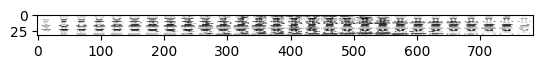

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `kill -9 <pid_of_tensorboard>'


In [60]:
!tensorboard --logdir=runs --load_fast=false


2025-03-21 04:06:57.339280: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742530017.359558    9024 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742530017.365638    9024 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
             ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tensorboard/main.py", line 41, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.11/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.11/